# 캘리포니아 집값 데이터 분석 2020

이 노트북은 2020년 캘리포니아 집값 데이터(`train.csv`)에 대한 탐색적 데이터 분석(EDA)을 수행합니다.
데이터의 특징을 파악하고, 모델링에 앞서 필요한 전처리 전략을 수립하는 것을 목표로 합니다.

## 1. 데이터 로드 및 기본 확인
데이터를 로드하고 행/열의 개수, 데이터 타입, 기초 통계량 등을 확인합니다.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows 기준)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 데이터 로드
file_path = 'data/california-house-prices/train.csv'
df = pd.read_csv(file_path)

# 데이터 크기 및 상위 5개 행 확인
print(f"데이터 크기 (행, 열): {df.shape}")
df.head()

데이터 크기 (행, 열): (47439, 41)


,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,...,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [27]:
# 데이터 정보 확인 (컬럼별 타입 및 결측치 여부)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47439 entries, 0 to 47438
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           47439 non-null  int64  
 1   Address                      47439 non-null  object 
 2   Sold Price                   47439 non-null  float64
 3   Summary                      47085 non-null  object 
 4   Type                         47439 non-null  object 
 5   Year built                   46394 non-null  float64
 6   Heating                      40587 non-null  object 
 7   Cooling                      26745 non-null  object 
 8   Parking                      46065 non-null  object 
 9   Lot                          33258 non-null  float64
 10  Bedrooms                     44567 non-null  object 
 11  Bathrooms                    43974 non-null  float64
 12  Full bathrooms               39574 non-null  float64
 13  Total interior l

In [28]:
# 수치형 데이터 기초 통계량 확인
df.describe()

,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,47439.000000,4.743900e+04,46394.000000,3.325800e+04,43974.000000,39574.000000,4.491300e+04,46523.000000,46522.000000,42543.000000,42697.000000,30734.000000,30735.000000,42220.000000,42438.000000,4.378700e+04,43129.000000,4.743900e+04,2.967300e+04,47439.000000
mean,23719.000000,1.296050e+06,1956.634888,2.353383e+05,2.355642,2.094961,5.774587e+03,1.567117,1.491746,5.720824,1.152411,5.317206,1.691593,6.134344,2.410366,7.863118e+05,9956.843817,1.315890e+06,8.078537e+05,93279.178587
std,13694.604047,1.694452e+06,145.802456,1.192507e+07,1.188805,0.963320,8.324363e+05,9.011608,8.964319,2.103350,2.332367,2.002768,2.462879,1.984711,3.596120,1.157796e+06,13884.254976,2.628695e+06,1.177903e+06,2263.459104
min,0.000000,1.005000e+05,0.000000,0.000000e+00,0.000000,1.000000,1.000000e+00,-15.000000,-15.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,85611.000000
25%,11859.500000,5.650000e+05,1946.000000,4.991000e+03,2.000000,2.000000,1.187000e+03,0.000000,0.000000,4.000000,0.300000,4.000000,0.600000,5.000000,0.800000,2.549615e+05,3467.000000,5.745000e+05,3.350000e+05,90220.000000
50%,23719.000000,9.600000e+05,1967.000000,6.502000e+03,2.000000,2.000000,1.566000e+03,1.000000,1.000000,6.000000,0.500000,5.000000,1.000000,6.000000,1.300000,5.475240e+05,7129.000000,9.490000e+05,5.980000e+05,94114.000000
75%,35578.500000,1.525000e+06,1989.000000,1.045400e+04,3.000000,2.000000,2.142000e+03,2.000000,2.000000,7.000000,1.000000,7.000000,1.800000,8.000000,2.400000,9.371625e+05,12010.000000,1.498844e+06,9.500000e+05,95073.000000
max,47438.000000,9.000000e+07,9999.000000,1.897474e+09,24.000000,17.000000,1.764164e+08,1000.000000,1000.000000,10.000000,57.200000,9.000000,57.200000,10.000000,73.900000,4.590000e+07,552485.000000,4.025320e+08,9.000000e+07,96155.000000


## 2. 타겟 변수 (`Sold Price`) 분석
예측해야 할 타겟 변수인 `Sold Price`의 분포를 확인합니다.
가격 데이터는 편향되어 있을 가능성이 높으므로 로그 변환 등을 고려해봅니다.

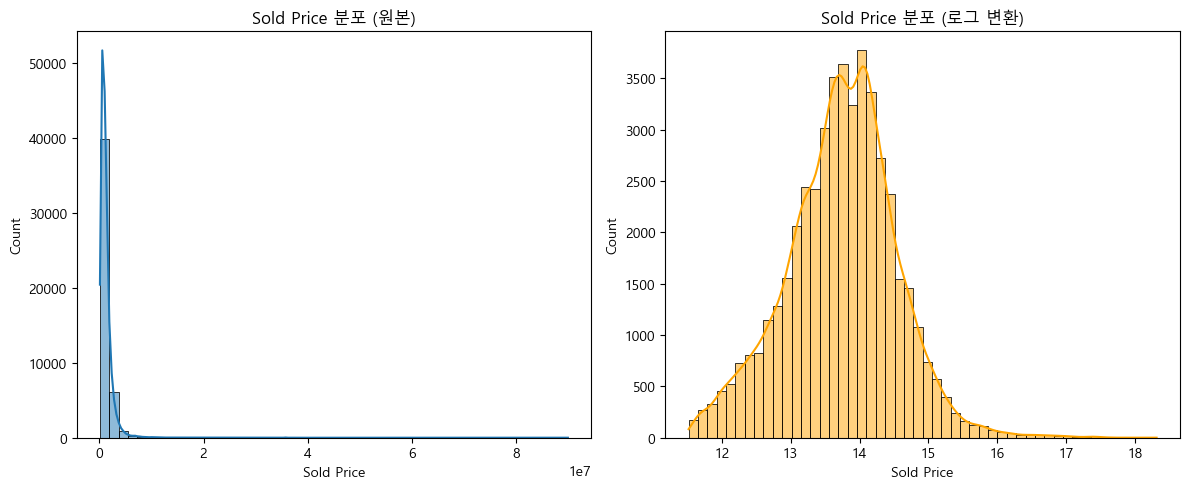

In [29]:
# Sold Price 분포 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Sold Price'], kde=True, bins=50)
plt.title('Sold Price 분포 (원본)')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['Sold Price']), kde=True, bins=50, color='orange')
plt.title('Sold Price 분포 (로그 변환)')

plt.tight_layout()
plt.show()

## 3. 결측치 (Missing Values) 분석 및 처리 전략
각 컬럼별 결측치 비율을 확인하고, 시각화합니다.
결측치가 너무 많은 컬럼은 삭제를 고려하고, 적절한 대체 전략을 모색합니다.

In [30]:
# 결측치 개수 및 비율 계산
missing_values = df.isnull().sum()
missing_ratio = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({'Missing Count': missing_values, 'Ratio (%)': missing_ratio})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Ratio (%)', ascending=False)

print("결측치가 있는 컬럼 수:", len(missing_df))
missing_df

결측치가 있는 컬럼 수: 32


,Missing Count,Ratio (%)
Cooling features,22223,46.845423
Cooling,20694,43.622336
Last Sold Price,17766,37.450199
Last Sold On,17766,37.450199
Middle School Score,16705,35.213643
Middle School Distance,16704,35.211535
Middle School,16704,35.211535
Laundry features,14611,30.799553
Lot,14181,29.893126
Appliances included,13593,28.653639


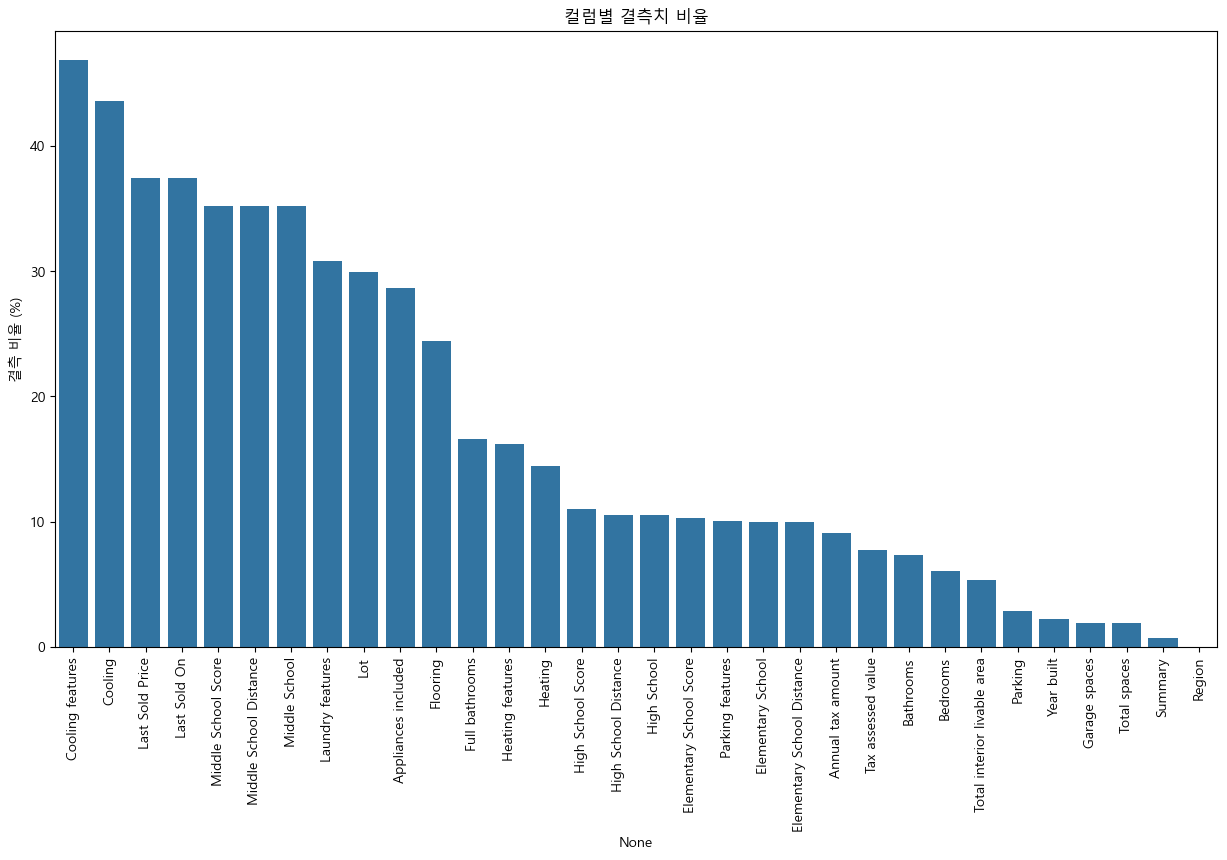

In [31]:
# 결측치 비율 시각화
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_df.index, y=missing_df['Ratio (%)'])
plt.xticks(rotation=90)
plt.title('컬럼별 결측치 비율')
plt.ylabel('결측 비율 (%)')
plt.show()

### 결측치 처리 아이디어
- **결측 비율이 50% 이상인 컬럼**: 정보 가치가 낮을 수 있으므로 삭제를 고려 (예: `Appliances included`, `Laundry features` 등)
- **수치형 변수 (`Score`, `Distance` 등)**: 평균, 중앙값(median)으로 대체하거나 0으로 채움 (정보가 없음을 0으로 간주할지 판단 필요)
- **범주형 변수**: 최빈값(mode)으로 대체하거나 'Unknown' 이라는 새로운 범주 생성

## 4. 상관관계 분석 (Correlation Analysis)
수치형 변수들 간의 상관관계를 히트맵으로 확인하여, 타겟(`Sold Price`)과 밀접한 관련이 있는 변수를 찾습니다.

Sold Price와 상관관계가 높은 변수 Top 10:
 Sold Price                 1.000000
Annual tax amount          0.746221
Tax assessed value         0.743233
Last Sold Price            0.706779
Listed Price               0.612651
Full bathrooms             0.544245
Bathrooms                  0.516208
Elementary School Score    0.275555
Middle School Score        0.244285
High School Score          0.191616
Name: Sold Price, dtype: float64


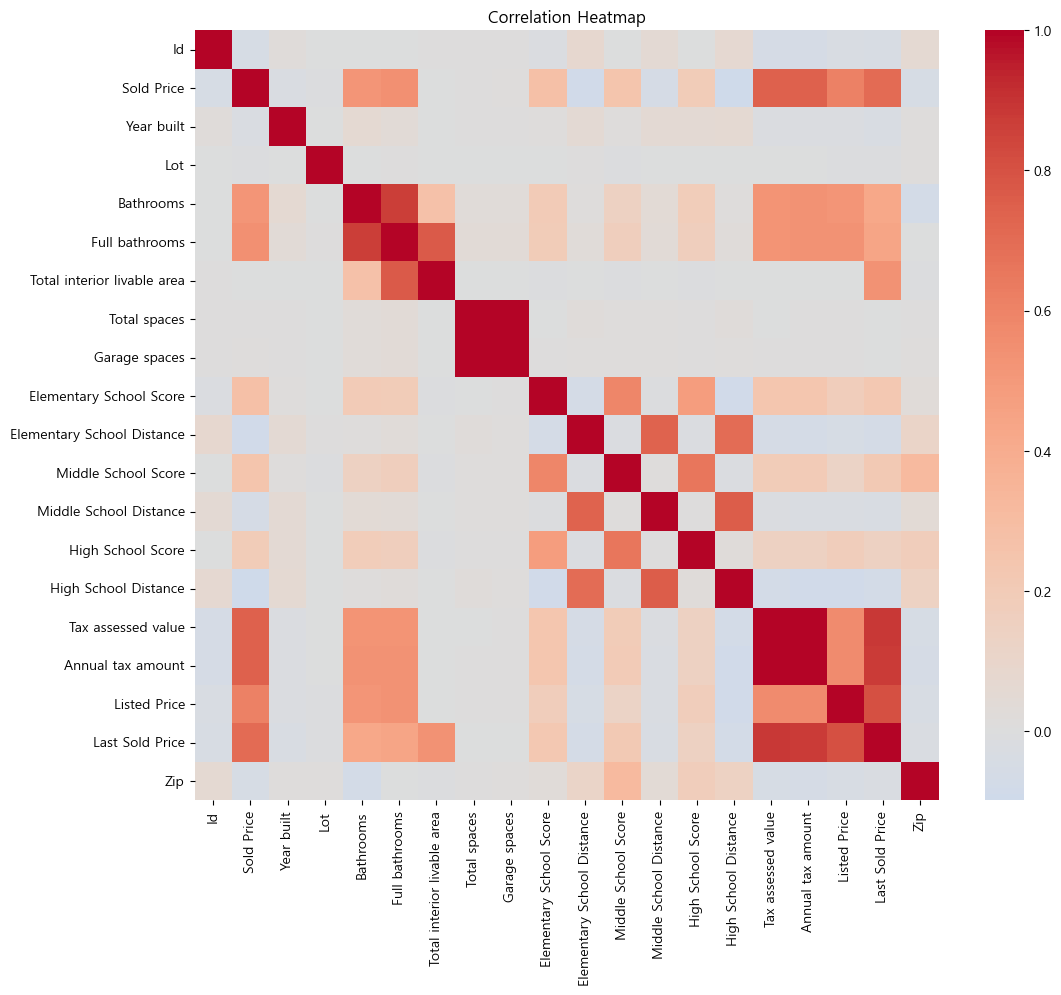

In [32]:
# 수치형 컬럼만 선택하여 상관관계 계산
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Sold Price와의 상관관계가 높은 변수 Top 10:\n
target_corr = correlation_matrix['Sold Price'].sort_values(ascending=False)
print("Sold Price와 상관관계가 높은 변수 Top 10:\n", target_corr.head(10))

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Heatmap')
plt.show()

## 5. 주요 변수 상세 분석 및 Feature Engineering 아이디어

### 5.1 Tax Assessed Value (공시 지가)
상관관계가 매우 높은 `Tax assessed value`, `Listed Price`, `Last Sold Price` 등은 모델 학습 시 **Data Leakage(정보 유출)**가 될 수 있으므로 주의해야 합니다.
(예: 집을 팔 때 책정된 세금 가치는 실제 집값과 거의 유사할 수 있음)

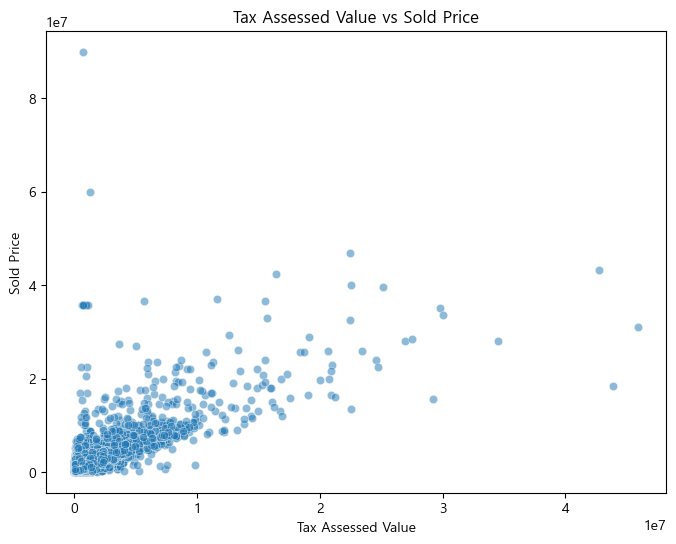

In [33]:
# Tax assessed value vs Sold Price 산점도
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tax assessed value', y='Sold Price', data=df, alpha=0.5)
plt.title('Tax Assessed Value vs Sold Price')
plt.xlabel('Tax Assessed Value')
plt.ylabel('Sold Price')
plt.show()

### 5.2 Year Built (건축 연도) -> Age (건물 연식)
`Year built`를 그대로 사용하기보다, 현재 연도(2020년 기준)에서 뺀 `Age` 변수를 생성하는 것이 더 효과적일 수 있습니다.

Year built 결측치 수: 1045


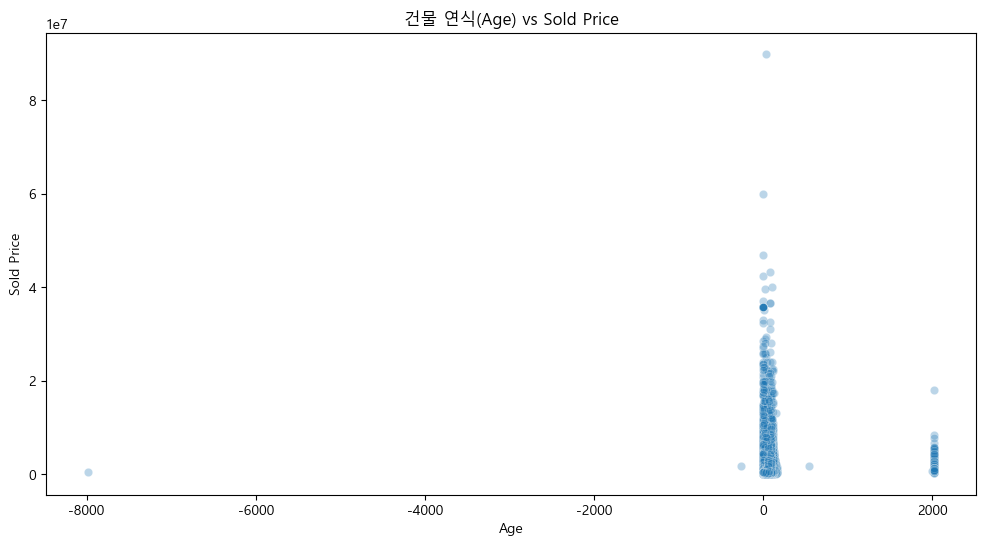

In [34]:
# Year built 결측치 확인
print(f"Year built 결측치 수: {df['Year built'].isnull().sum()}")

# Age 파생변수 생성 (2020년 기준)
df['Age'] = 2020 - df['Year built']

# Age와 Sold Price 관계 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Sold Price', data=df, alpha=0.3)
plt.title('건물 연식(Age) vs Sold Price')
plt.show()

### 5.3 욕실(Bathrooms) 및 침실(Bedrooms) 개수
0개로 표기된 이상치 데이터가 있는지 확인하고 처리 방법을 고민합니다.

In [35]:
# 욕실이 0개인 데이터 확인
zero_bath = df[df['Bathrooms'] == 0]
print(f"욕실이 0개인 데이터 수: {len(zero_bath)}")

# 침실이 0개인 데이터 확인
zero_bed = df[df['Bedrooms'] == 0]
print(f"침실이 0개인 데이터 수: {len(zero_bed)}")

# 예시 출력
df[['Bathrooms', 'Bedrooms', 'Sold Price']].describe()

욕실이 0개인 데이터 수: 497
침실이 0개인 데이터 수: 0


,Bathrooms,Sold Price
count,43974.000000,4.743900e+04
mean,2.355642,1.296050e+06
std,1.188805,1.694452e+06
min,0.000000,1.005000e+05
25%,2.000000,5.650000e+05
50%,2.000000,9.600000e+05
75%,3.000000,1.525000e+06
max,24.000000,9.000000e+07


## 6. 결론 및 향후 계획

### 분석 요약
1. **타겟 변수**: `Sold Price`는 오른쪽으로 꼬리가 긴 분포를 보이므로 **로그 변환**하여 학습하는 것이 좋습니다.
2. **결측치**: 일부 컬럼은 결측 비율이 매우 높습니다. 50% 이상 결측인 컬럼은 삭제하고, 나머지는 중앙값 등으로 채우는 전략이 필요합니다.
3. **상관관계**: `Tax assessed value`, `Listed Price` 등은 타겟과 매우 높은 상관관계를 보이지만, 예측 시점에는 알 수 없는 정보일 수 있으므로 사용에 주의해야 합니다.
4. **파생 변수**: `Year built`를 `Age`로 변환하는 등 추가적인 특성 공학(Feature Engineering)이 성능 향상에 도움이 될 것입니다.

### 다음 단계 (Modeling)
- 결측치 전처리 (Imputation)
- 범주형 변수 인코딩 (Label Encoding / One-Hot Encoding)
- 이상치 제거 (Outlier Removal)
- 베이스라인 모델 학습 및 평가

## 7. AutoGluon을 이용한 모델링

위에서 세운 계획에 따라 데이터 전처리를 수행하고, AutoGluon을 사용하여 모델을 학습, 비교, 예측합니다.
요청하신 대로 CPU 자원은 약 2/3인 8개를 사용하며, 성능이 가장 좋은 프리셋(`best_quality`)을 사용합니다.

In [36]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor

# 데이터 다시 로드
train_df = pd.read_csv('data/california-house-prices/train.csv')
test_df = pd.read_csv('data/california-house-prices/test.csv')
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# 1. 결측치 비율 50% 이상 컬럼 삭제
missing_ratio = train_df.isnull().sum() / len(train_df)
drop_cols = missing_ratio[missing_ratio > 0.5].index.tolist()
print(f"삭제할 컬럼 (결측치 > 50%): {drop_cols}")

train_df = train_df.drop(columns=drop_cols)
test_df = test_df.drop(columns=drop_cols)

# 2. 나머지 결측치 처리 (수치형: 중앙값, 범주형: Unknown)
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
categorical_cols = train_df.select_dtypes(exclude=[np.number]).columns

# 타겟 변수 제외
if 'Sold Price' in numeric_cols:
    numeric_cols = numeric_cols.drop('Sold Price')

# 수치형: 중앙값 대체 (Train 기준)
for col in numeric_cols:
    median_val = train_df[col].median()
    train_df[col] = train_df[col].fillna(median_val)
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(median_val)

# 범주형: Unknown 대체
for col in categorical_cols:
    train_df[col] = train_df[col].fillna("Unknown")
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna("Unknown")

# 3. 타겟 변수 로그 변환
train_df['Sold Price'] = np.log1p(train_df['Sold Price'])

# 4. Id 컬럼 처리
if 'Id' in train_df.columns:
    train_df = train_df.drop(columns=['Id'])

# Test Id 저장 및 제거
if 'Id' in test_df.columns:
    test_ids = test_df['Id']
    test_df = test_df.drop(columns=['Id'])
else:
    test_ids = test_df.index

print("전처리 완료.")

Train shape: (47439, 41)
Test shape: (31626, 40)
삭제할 컬럼 (결측치 > 50%): []
전처리 완료.


In [37]:
# AutoGluon 학습 설정 및 실행
label = 'Sold Price'
save_path = 'AutogluonModels/ag_california_price'

# 1 시간(3600초) 제한 설정, 12개 CPU 중 2/3인 8개 사용, best_quality 프리셋 사용
# dynamic_stacking=False를 추가하여 시간 부족 오류 방지
predictor = TabularPredictor(label=label, path=save_path).fit(
    train_data=train_df,
    presets='best_quality',
    num_cpus=8,
    time_limit=3600,  # 학습 시간 1시간(3600초) 제한
    dynamic_stacking=False
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          12
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       12.68 GB / 31.10 GB (40.8%)
Disk Space Avail:   218.84 GB / 930.84 GB (23.5%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "c:\Users\ailee\github\sklearn-est--\AutogluonModels\ag_california_price"
Train Data Rows:    47439
Train Data Columns: 39
Label Column:       Sold Price
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mea

                    model  score_val              eval_metric  pred_time_val  \
0     WeightedEnsemble_L3  -0.187572  root_mean_squared_error     221.256435   
1     WeightedEnsemble_L2  -0.188658  root_mean_squared_error     110.901488   
2         LightGBM_BAG_L2  -0.191192  root_mean_squared_error     112.232534   
3  RandomForestMSE_BAG_L2  -0.191363  root_mean_squared_error     219.923894   
4       LightGBMXT_BAG_L1  -0.193436  root_mean_squared_error       2.451172   
5         LightGBM_BAG_L1  -0.193511  root_mean_squared_error       1.406731   
6       LightGBMXT_BAG_L2  -0.194651  root_mean_squared_error     112.292718   
7  RandomForestMSE_BAG_L1  -0.203763  root_mean_squared_error     107.043074   

      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0  5022.736104                0.000985           0.024529            3   
1  2445.329564                0.000510           0.015222            2   
2  2483.838587                1.331556          38.524245

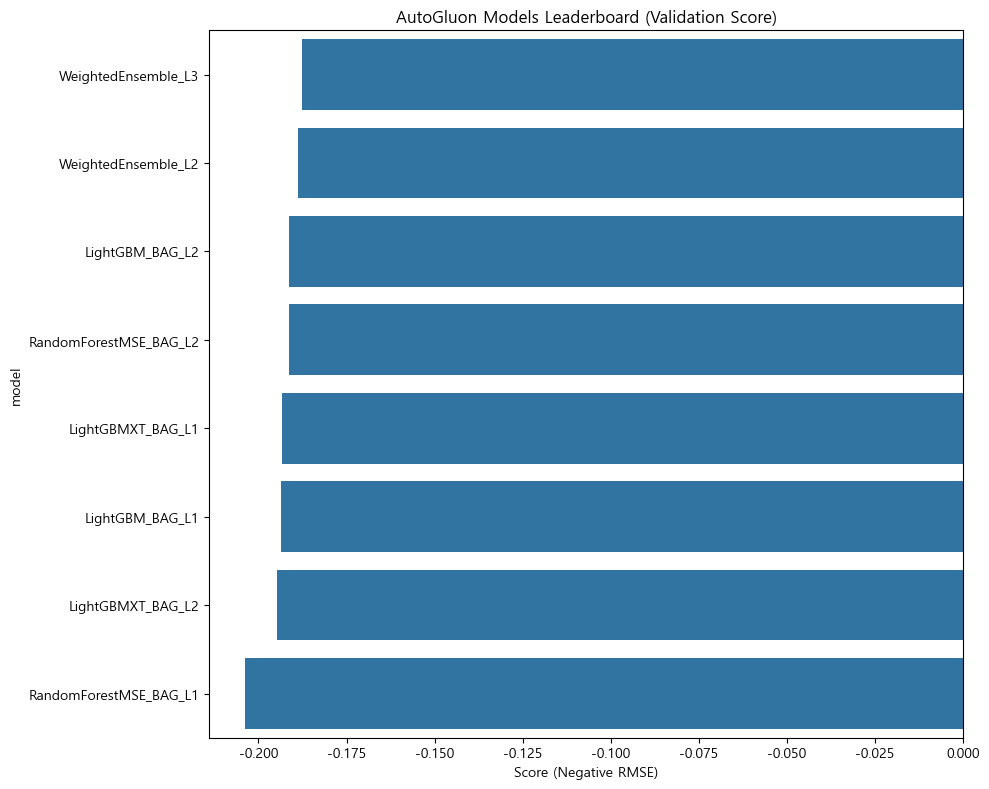

In [38]:
# 리더보드 확인 및 시각화
leaderboard = predictor.leaderboard(silent=True)
print(leaderboard.head(10))

plt.figure(figsize=(10, 8))
sns.barplot(x='score_val', y='model', data=leaderboard.head(20))
plt.title('AutoGluon Models Leaderboard (Validation Score)')
plt.xlabel('Score (Negative RMSE)')
plt.tight_layout()
plt.show()

In [39]:
# 최종 예측 및 CSV 저장
predictions_log = predictor.predict(test_df)
# 로그 변환 역변환 (exp)
predictions = np.expm1(predictions_log)

submission = pd.DataFrame({
    'Id': test_ids,
    'Sold Price': predictions
})

submission_path = 'submission_autogluon.csv'
submission.to_csv(submission_path, index=False)
print(f"최종 예측 결과가 '{submission_path}'로 저장되었습니다.")
submission.head()

최종 예측 결과가 'submission_autogluon.csv'로 저장되었습니다.


,Id,Sold Price
0,47439,8.399613e+05
1,47440,5.997431e+05
2,47441,8.458238e+05
3,47442,8.329376e+05
4,47443,1.125736e+06
